<h1><center>Speech Emotion Recognition</center></h1>

In [237]:
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [238]:
dataset_path = '/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/'

In [239]:
# Function to extract features from each audio file
def extract_features(file_path):
    audio, sampling_rate = librosa.load(file_path, sr=22050, duration=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sampling_rate, n_mfcc=30)
    features = np.mean(mfccs.T, axis=0)
    return features

# Function to extract features from each audio file without silent moments
def extract_features_trim(file_path):
    audio, sampling_rate = librosa.load(file_path, sr=22050, duration=None)
    audio, index = librosa.effects.trim(audio, top_db=20, frame_length=512, hop_length=256)
    mfccs = librosa.feature.mfcc(y=audio, sr=sampling_rate, n_mfcc=30)
    features = np.mean(mfccs.T, axis=0)
    return features

# Function to preprocess the data
def preprocess_data(dataset_path):
    X = []
    y = []
    for folder in os.listdir(dataset_path):
        for file in os.listdir(os.path.join(dataset_path, folder)):
            if file.endswith('.wav'):
                
                emotion = file.split('-')[2]
                if int(emotion) == 1:
                    label = 'Neutral'
                elif int(emotion) == 2:
                    label = 'Calm'
                elif int(emotion) == 3:
                    label = 'Happy'
                elif int(emotion) == 4:
                    label = 'Sad'
                elif int(emotion) == 5:
                    label = 'Angry'
                elif int(emotion) == 6:
                    label = 'Fearful'
                elif int(emotion) == 7:
                    label = 'Disgust'
                elif int(emotion) == 8:
                    label = 'Surprised'
                else:
                    label = 'UNK'
                    
                file_path = os.path.join(dataset_path, folder, file)
                features = extract_features(file_path)
                X.append(features)
                y.append(label)
    return np.array(X), np.array(y)

# Function for displaying confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix For {}'.format(title))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

In [240]:
# Preprocess the data
X, y = preprocess_data(dataset_path)

# Print the shape of the feature matrix and the label array
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1440, 30)
Shape of y: (1440,)


In [241]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


<h3>Supervised Machine Learning Models</h3>
- Support Vector Machine


In [242]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Train SVM model
svm = SVC(kernel='linear', gamma='auto')
svm.fit(X_train, y_train)

# Predict on test set
y_pred = svm.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Angry       0.53      0.74      0.62        34
        Calm       0.48      0.68      0.56        40
     Disgust       0.53      0.38      0.44        45
     Fearful       0.41      0.48      0.44        31
       Happy       0.52      0.39      0.44        41
     Neutral       0.29      0.21      0.24        19
         Sad       0.39      0.34      0.36        35
   Surprised       0.47      0.44      0.46        43

    accuracy                           0.47       288
   macro avg       0.45      0.46      0.45       288
weighted avg       0.47      0.47      0.46       288



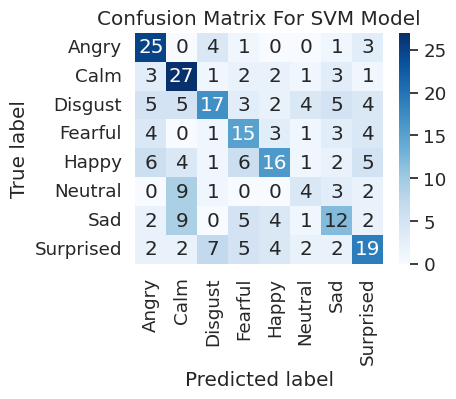

In [243]:
plot_confusion_matrix(y_test, y_pred, np.unique(y_test), 'SVM Model')

- K Nearest Neighbor

In [244]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Angry       0.38      0.76      0.50        34
        Calm       0.44      0.72      0.55        40
     Disgust       0.32      0.20      0.25        45
     Fearful       0.36      0.39      0.38        31
       Happy       0.46      0.32      0.38        41
     Neutral       0.23      0.32      0.27        19
         Sad       0.43      0.17      0.24        35
   Surprised       0.33      0.19      0.24        43

    accuracy                           0.38       288
   macro avg       0.37      0.38      0.35       288
weighted avg       0.38      0.38      0.35       288



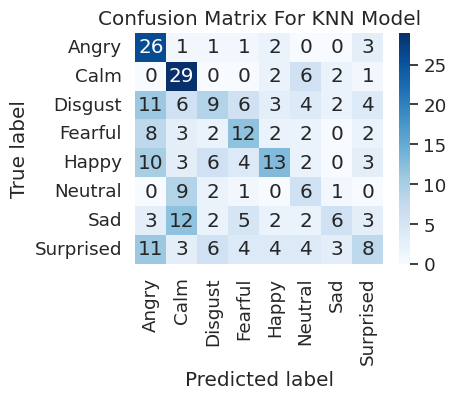

In [245]:
plot_confusion_matrix(y_test, y_pred, np.unique(y_test), 'KNN Model')

- Decision Tree

In [246]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
dt = DecisionTreeClassifier(random_state=29)
dt.fit(X_train, y_train)

# Predict on test set
y_pred = dt.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Angry       0.59      0.76      0.67        34
        Calm       0.53      0.50      0.51        40
     Disgust       0.54      0.29      0.38        45
     Fearful       0.38      0.48      0.42        31
       Happy       0.41      0.27      0.32        41
     Neutral       0.26      0.42      0.32        19
         Sad       0.33      0.37      0.35        35
   Surprised       0.50      0.51      0.51        43

    accuracy                           0.44       288
   macro avg       0.44      0.45      0.43       288
weighted avg       0.46      0.44      0.44       288



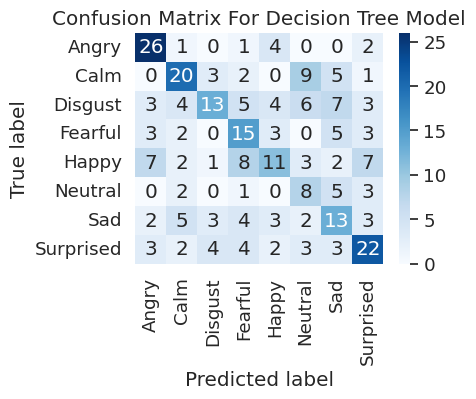

In [247]:
plot_confusion_matrix(y_test, y_pred, np.unique(y_test), 'Decision Tree Model')

- Random Forest

In [248]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Angry       0.77      0.71      0.74        34
        Calm       0.55      0.90      0.69        40
     Disgust       0.61      0.51      0.55        45
     Fearful       0.56      0.71      0.63        31
       Happy       0.76      0.54      0.63        41
     Neutral       0.60      0.32      0.41        19
         Sad       0.47      0.46      0.46        35
   Surprised       0.71      0.70      0.71        43

    accuracy                           0.62       288
   macro avg       0.63      0.60      0.60       288
weighted avg       0.64      0.62      0.62       288



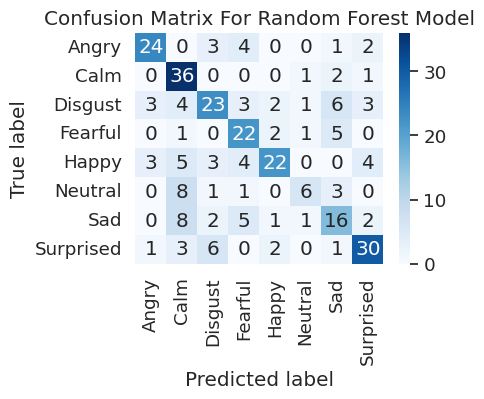

In [249]:
plot_confusion_matrix(y_test, y_pred, np.unique(y_test), 'Random Forest Model')

As we can see, the best results of  Supervised machine learning models are:
- Random Forest => 62%
- Support Vector Machine => 46%

Here ,we are developing Ensemble learning model using Randomforest,SVM,DecisionTree

In [250]:
m1=RandomForestClassifier()
m2=SVC()
m3=DecisionTreeClassifier()

In [251]:
from sklearn.ensemble import VotingClassifier
from sklearn.multioutput import MultiOutputClassifier
model5=VotingClassifier([('md2',m1),('m2trim',m2),('m3trim',m3)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model5.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
model5.score(X_train,y_train)

1.0

In [252]:
model5.score(X_test,y_test)

0.4930555555555556

**CNN model**

In [253]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [254]:
OHE = OneHotEncoder()

y = np.array(y).reshape(-1,1)
y = OHE.fit_transform(y).toarray()

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=29,
                                                    test_size=0.25,
                                                    shuffle=True)

print('X_train: {}'.format(X_train.shape))
print('y_train: {}'.format(y_train.shape))
print('X_test: {}'.format(X_test.shape))
print('y_test: {}'.format(y_test.shape))

X_train: (1080, 30)
y_train: (1080, 8)
X_test: (360, 30)
y_test: (360, 8)


In [256]:
SS = StandardScaler()

X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

In [257]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

print('X_train: {}'.format(X_train.shape))
print('X_test: {}'.format(X_test.shape))

X_train: (1080, 30, 1)
X_test: (360, 30, 1)


In [258]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=20)

# Function to plot Training Accuracy vs Validation Accuracy
def TrainVal_plot(history):
    val_acc = history.history['val_accuracy']
    train_acc = history.history['accuracy']

    epochs = range(1, early_stop.stopped_epoch+2)
    plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
    plt.plot(epochs, train_acc, 'r', label='Training Accuracy')
    plt.title('Training vs. Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_62 (Conv1D)          (None, 28, 32)            128       
                                                                 
 conv1d_63 (Conv1D)          (None, 26, 64)            6208      
                                                                 
 conv1d_64 (Conv1D)          (None, 24, 128)           24704     
                                                                 
 conv1d_65 (Conv1D)          (None, 22, 256)           98560     
                                                                 
 flatten_19 (Flatten)        (None, 5632)              0         
                                                                 
 dense_38 (Dense)            (None, 128)               721024    
                                                                 
 dropout_33 (Dropout)        (None, 128)             

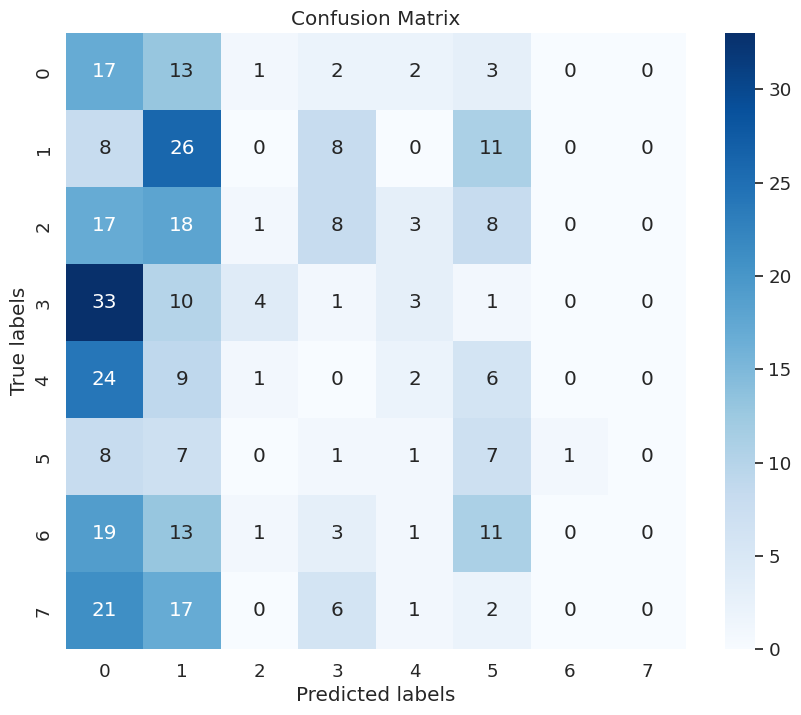

In [259]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define input shape
input_shape = (X_train.shape[1], 1)

# Create model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=8, activation='softmax'))

# Compile model with appropriate loss function, optimizer and metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()

# Make predictions on test data
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)  # Assuming one-hot encoded labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print or visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(8), yticklabels=range(8))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [260]:
history = model.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=300,
                        validation_data=(X_test, y_test),
                       callbacks=[early_stop])

Epoch 1/300
34/34 [==============================] - 2s 22ms/step - loss: 1.9868 - accuracy: 0.2074 - val_loss: 1.8441 - val_accuracy: 0.2833
Epoch 2/300
34/34 [==============================] - 1s 15ms/step - loss: 1.7811 - accuracy: 0.3370 - val_loss: 1.7331 - val_accuracy: 0.3361
Epoch 3/300
34/34 [==============================] - 1s 15ms/step - loss: 1.5656 - accuracy: 0.4111 - val_loss: 1.5004 - val_accuracy: 0.4500
Epoch 4/300
34/34 [==============================] - 1s 15ms/step - loss: 1.3433 - accuracy: 0.4963 - val_loss: 1.3641 - val_accuracy: 0.5083
Epoch 5/300
34/34 [==============================] - 1s 15ms/step - loss: 1.1138 - accuracy: 0.5954 - val_loss: 1.2896 - val_accuracy: 0.5222
Epoch 6/300
34/34 [==============================] - 1s 15ms/step - loss: 0.9171 - accuracy: 0.6583 - val_loss: 1.2187 - val_accuracy: 0.5778
Epoch 7/300
34/34 [==============================] - 1s 15ms/step - loss: 0.6942 - accuracy: 0.7380 - val_loss: 1.1814 - val_accuracy: 0.5917
Epoch 

In [261]:
print("Accuracy of our model on test data : " , round(model.evaluate(X_test,y_test)[1]*100,2) , "%")


12/12 [==============================] - 0s 4ms/step - loss: 1.6390 - accuracy: 0.6750
Accuracy of our model on test data :  67.5 %


In [262]:
print("Accuracy of our model on Train data : " , round(model.evaluate(X_train,y_train)[1]*100,2) , "%")



34/34 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 0.9991
Accuracy of our model on Train data :  99.91 %


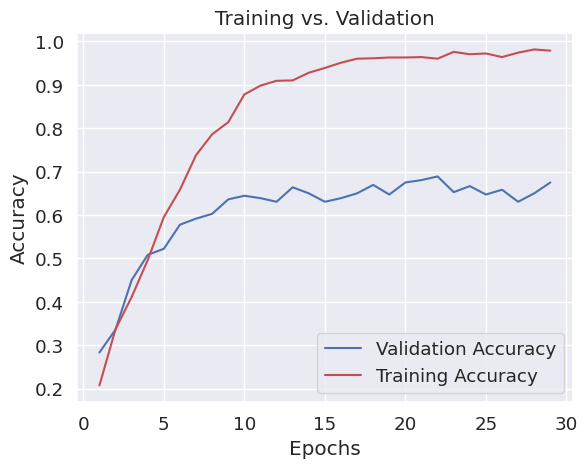

In [263]:
TrainVal_plot(history)

In [264]:
model2 = Sequential()

model2.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=input_shape))
model2.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model2.add(Dropout(0.7))
model2.add(Conv1D(filters=64, kernel_size=5, activation='relu'))

model2.add(Flatten())

model2.add(Dense(units=128, activation='relu'))
model2.add(Dropout(0.6))

model2.add(Dense(units=8, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_66 (Conv1D)          (None, 26, 32)            192       
                                                                 
 conv1d_67 (Conv1D)          (None, 22, 64)            10304     
                                                                 
 dropout_34 (Dropout)        (None, 22, 64)            0         
                                                                 
 conv1d_68 (Conv1D)          (None, 18, 64)            20544     
                                                                 
 flatten_20 (Flatten)        (None, 1152)              0         
                                                                 
 dense_40 (Dense)            (None, 128)               147584    
                                                                 
 dropout_35 (Dropout)        (None, 128)             

In [265]:
history = model2.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=300,
                        validation_data=(X_test, y_test),
                        callbacks=[early_stop])

Epoch 1/300
34/34 [==============================] - 2s 14ms/step - loss: 2.0715 - accuracy: 0.1324 - val_loss: 2.0235 - val_accuracy: 0.1861
Epoch 2/300
34/34 [==============================] - 0s 7ms/step - loss: 2.0119 - accuracy: 0.1944 - val_loss: 1.9518 - val_accuracy: 0.2472
Epoch 3/300
34/34 [==============================] - 0s 7ms/step - loss: 1.9793 - accuracy: 0.2185 - val_loss: 1.9320 - val_accuracy: 0.2583
Epoch 4/300
34/34 [==============================] - 0s 7ms/step - loss: 1.9277 - accuracy: 0.2315 - val_loss: 1.8866 - val_accuracy: 0.2694
Epoch 5/300
34/34 [==============================] - 0s 7ms/step - loss: 1.9190 - accuracy: 0.2481 - val_loss: 1.8935 - val_accuracy: 0.2722
Epoch 6/300
34/34 [==============================] - 0s 8ms/step - loss: 1.8789 - accuracy: 0.2722 - val_loss: 1.8082 - val_accuracy: 0.3056
Epoch 7/300
34/34 [==============================] - 0s 7ms/step - loss: 1.8402 - accuracy: 0.2917 - val_loss: 1.7727 - val_accuracy: 0.3306
Epoch 8/300


In [266]:
print("Accuracy of our model on test data : " , round(model2.evaluate(X_test,y_test)[1]*100,2) , "%")


12/12 [==============================] - 0s 3ms/step - loss: 1.0539 - accuracy: 0.6722
Accuracy of our model on test data :  67.22 %


In [267]:
print("Accuracy of our model on Train data : " , round(model2.evaluate(X_train,y_train)[1]*100,2) , "%")



34/34 [==============================] - 0s 2ms/step - loss: 0.0955 - accuracy: 0.9935
Accuracy of our model on Train data :  99.35 %


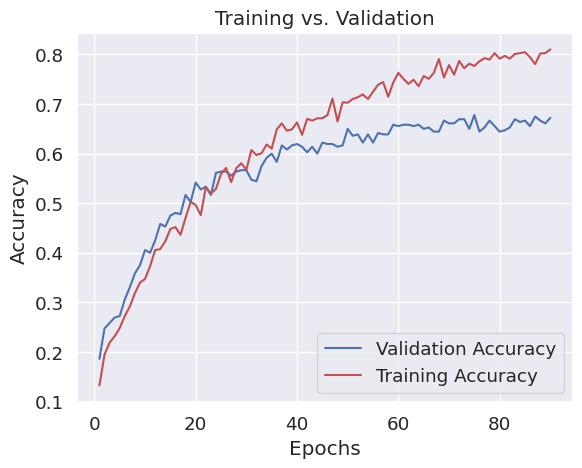

In [268]:
TrainVal_plot(history)

In [269]:
model3 = Sequential()

model3.add(Conv1D(filters=32, kernel_size=7, activation='relu', input_shape=input_shape))
model3.add(Conv1D(filters=32, kernel_size=7, activation='relu'))
model3.add(Dropout(0.7))
model3.add(Conv1D(filters=64, kernel_size=7, activation='relu'))

model3.add(Flatten())

model3.add(Dense(units=128, activation='relu'))
model3.add(Dropout(0.6))

model3.add(Dense(units=8, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model3.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_69 (Conv1D)          (None, 24, 32)            256       
                                                                 
 conv1d_70 (Conv1D)          (None, 18, 32)            7200      
                                                                 
 dropout_36 (Dropout)        (None, 18, 32)            0         
                                                                 
 conv1d_71 (Conv1D)          (None, 12, 64)            14400     
                                                                 
 flatten_21 (Flatten)        (None, 768)               0         
                                                                 
 dense_42 (Dense)            (None, 128)               98432     
                                                                 
 dropout_37 (Dropout)        (None, 128)             

In [270]:
history = model3.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=300,
                        validation_data=(X_test, y_test), 
                        callbacks=[early_stop])

Epoch 1/300
34/34 [==============================] - 2s 12ms/step - loss: 2.0579 - accuracy: 0.1519 - val_loss: 2.0190 - val_accuracy: 0.1917
Epoch 2/300
34/34 [==============================] - 0s 6ms/step - loss: 2.0205 - accuracy: 0.1926 - val_loss: 1.9571 - val_accuracy: 0.3083
Epoch 3/300
34/34 [==============================] - 0s 6ms/step - loss: 1.9893 - accuracy: 0.2056 - val_loss: 1.9228 - val_accuracy: 0.3139
Epoch 4/300
34/34 [==============================] - 0s 6ms/step - loss: 1.9390 - accuracy: 0.2380 - val_loss: 1.8667 - val_accuracy: 0.3278
Epoch 5/300
34/34 [==============================] - 0s 6ms/step - loss: 1.9245 - accuracy: 0.2519 - val_loss: 1.8911 - val_accuracy: 0.3000
Epoch 6/300
34/34 [==============================] - 0s 6ms/step - loss: 1.9055 - accuracy: 0.2435 - val_loss: 1.8139 - val_accuracy: 0.3361
Epoch 7/300
34/34 [==============================] - 0s 6ms/step - loss: 1.8637 - accuracy: 0.2731 - val_loss: 1.7769 - val_accuracy: 0.4000
Epoch 8/300


In [271]:
print("Accuracy of our model on test data : " , round(model3.evaluate(X_test,y_test)[1]*100,2) , "%")


12/12 [==============================] - 0s 2ms/step - loss: 1.0243 - accuracy: 0.6417
Accuracy of our model on test data :  64.17 %


In [272]:
print("Accuracy of our model on Train data : " , round(model3.evaluate(X_train,y_train)[1]*100,2) , "%")



34/34 [==============================] - 0s 2ms/step - loss: 0.1873 - accuracy: 0.9731
Accuracy of our model on Train data :  97.31 %


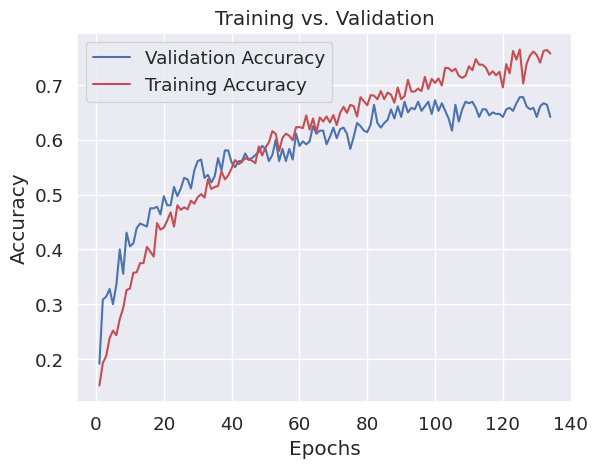

In [273]:
TrainVal_plot(history)

i'll try preprocessing for audio data using <b>Trim audio technique</b>

In [274]:
# Function to preprocess the data
def preprocess_data(dataset_path):
    X = []
    y = []
    for folder in os.listdir(dataset_path):
        for file in os.listdir(os.path.join(dataset_path, folder)):
            if file.endswith('.wav'):
                
                emotion = file.split('-')[2]
                if int(emotion) == 1:
                    label = 'Neutral'
                elif int(emotion) == 2:
                    label = 'Calm'
                elif int(emotion) == 3:
                    label = 'Happy'
                elif int(emotion) == 4:
                    label = 'Sad'
                elif int(emotion) == 5:
                    label = 'Angry'
                elif int(emotion) == 6:
                    label = 'Fearful'
                elif int(emotion) == 7:
                    label = 'Disgust'
                elif int(emotion) == 8:
                    label = 'Surprised'
                else:
                    label = 'UNK'
                    
                file_path = os.path.join(dataset_path, folder, file)
                features = extract_features_trim(file_path)
                X.append(features)
                y.append(label)
    return np.array(X), np.array(y)

In [275]:
# Preprocess the data
X, y = preprocess_data(dataset_path)

# Print the shape of the feature matrix and the label array
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1440, 30)
Shape of y: (1440,)


In [276]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

OHE = OneHotEncoder()
SS = StandardScaler()

y = np.array(y).reshape(-1,1)
y = OHE.fit_transform(y).toarray()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=29,
                                                    test_size=0.25,
                                                    shuffle=True)

X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

print('X_train: {}'.format(X_train.shape))
print('X_test: {}'.format(X_test.shape))

X_train: (1080, 30, 1)
X_test: (360, 30, 1)


In [277]:
model2_trim = Sequential()

model2_trim.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=input_shape))
model2_trim.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model2_trim.add(Dropout(0.7))
model2_trim.add(Conv1D(filters=64, kernel_size=5, activation='relu'))

model2_trim.add(Flatten())

model2_trim.add(Dense(units=128, activation='relu'))
model2_trim.add(Dropout(0.6))

model2_trim.add(Dense(units=8, activation='softmax'))

model2_trim.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model2_trim.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_72 (Conv1D)          (None, 26, 32)            192       
                                                                 
 conv1d_73 (Conv1D)          (None, 22, 64)            10304     
                                                                 
 dropout_38 (Dropout)        (None, 22, 64)            0         
                                                                 
 conv1d_74 (Conv1D)          (None, 18, 64)            20544     
                                                                 
 flatten_22 (Flatten)        (None, 1152)              0         
                                                                 
 dense_44 (Dense)            (None, 128)               147584    
                                                                 
 dropout_39 (Dropout)        (None, 128)             

In [278]:
history = model2_trim.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=300,
                        validation_data=(X_test, y_test),
                        callbacks=[early_stop])

Epoch 1/300
34/34 [==============================] - 2s 13ms/step - loss: 2.0652 - accuracy: 0.1509 - val_loss: 2.0289 - val_accuracy: 0.1944
Epoch 2/300
34/34 [==============================] - 0s 8ms/step - loss: 1.9986 - accuracy: 0.1926 - val_loss: 1.9495 - val_accuracy: 0.2694
Epoch 3/300
34/34 [==============================] - 0s 7ms/step - loss: 1.9532 - accuracy: 0.2241 - val_loss: 1.8800 - val_accuracy: 0.3000
Epoch 4/300
34/34 [==============================] - 0s 7ms/step - loss: 1.9140 - accuracy: 0.2454 - val_loss: 1.8156 - val_accuracy: 0.3333
Epoch 5/300
34/34 [==============================] - 0s 7ms/step - loss: 1.8710 - accuracy: 0.2759 - val_loss: 1.8062 - val_accuracy: 0.3250
Epoch 6/300
34/34 [==============================] - 0s 8ms/step - loss: 1.8151 - accuracy: 0.3120 - val_loss: 1.7196 - val_accuracy: 0.3778
Epoch 7/300
34/34 [==============================] - 0s 7ms/step - loss: 1.7540 - accuracy: 0.3426 - val_loss: 1.6647 - val_accuracy: 0.3722
Epoch 8/300


In [279]:
print("Accuracy of our model on test data : " , round(model2_trim.evaluate(X_test,y_test)[1]*100,2) , "%")


12/12 [==============================] - 0s 3ms/step - loss: 0.9676 - accuracy: 0.7000
Accuracy of our model on test data :  70.0 %


In [280]:
print("Accuracy of our model on Train data : " , round(model2_trim.evaluate(X_train,y_train)[1]*100,2) , "%")



34/34 [==============================] - 0s 3ms/step - loss: 0.0941 - accuracy: 0.9926
Accuracy of our model on Train data :  99.26 %


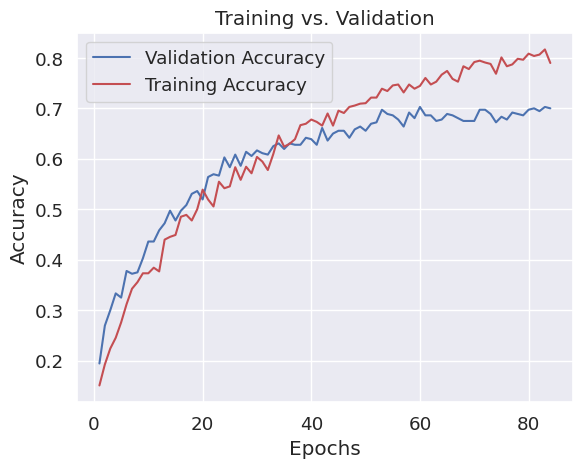

In [281]:
TrainVal_plot(history)

In [282]:
model3_trim = Sequential()

model3_trim.add(Conv1D(filters=32, kernel_size=7, activation='relu', input_shape=input_shape))
model3_trim.add(Conv1D(filters=32, kernel_size=7, activation='relu'))
model3_trim.add(Dropout(0.7))
model3_trim.add(Conv1D(filters=64, kernel_size=7, activation='relu'))

model3_trim.add(Flatten())

model3_trim.add(Dense(units=128, activation='relu'))
model3_trim.add(Dropout(0.6))

model3_trim.add(Dense(units=8, activation='softmax'))

model3_trim.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model3_trim.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_75 (Conv1D)          (None, 24, 32)            256       
                                                                 
 conv1d_76 (Conv1D)          (None, 18, 32)            7200      
                                                                 
 dropout_40 (Dropout)        (None, 18, 32)            0         
                                                                 
 conv1d_77 (Conv1D)          (None, 12, 64)            14400     
                                                                 
 flatten_23 (Flatten)        (None, 768)               0         
                                                                 
 dense_46 (Dense)            (None, 128)               98432     
                                                                 
 dropout_41 (Dropout)        (None, 128)             

In [283]:
history = model3_trim.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=300,
                        validation_data=(X_test, y_test),
                        callbacks=[early_stop])

Epoch 1/300
34/34 [==============================] - 2s 12ms/step - loss: 2.0650 - accuracy: 0.1519 - val_loss: 2.0249 - val_accuracy: 0.2861
Epoch 2/300
34/34 [==============================] - 0s 6ms/step - loss: 2.0241 - accuracy: 0.1722 - val_loss: 1.9941 - val_accuracy: 0.2556
Epoch 3/300
34/34 [==============================] - 0s 6ms/step - loss: 2.0053 - accuracy: 0.1926 - val_loss: 1.9469 - val_accuracy: 0.3111
Epoch 4/300
34/34 [==============================] - 0s 6ms/step - loss: 1.9535 - accuracy: 0.2287 - val_loss: 1.9155 - val_accuracy: 0.3056
Epoch 5/300
34/34 [==============================] - 0s 6ms/step - loss: 1.9474 - accuracy: 0.2435 - val_loss: 1.8672 - val_accuracy: 0.3083
Epoch 6/300
34/34 [==============================] - 0s 6ms/step - loss: 1.9012 - accuracy: 0.2519 - val_loss: 1.8317 - val_accuracy: 0.3167
Epoch 7/300
34/34 [==============================] - 0s 6ms/step - loss: 1.8825 - accuracy: 0.2713 - val_loss: 1.8210 - val_accuracy: 0.2861
Epoch 8/300


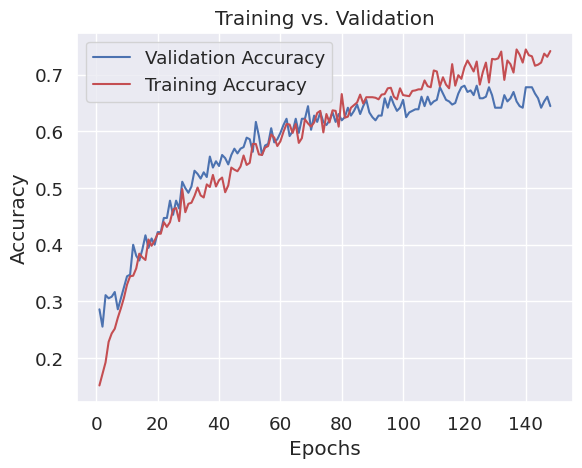

In [284]:
TrainVal_plot(history)

In [285]:
print("Accuracy of our model on test data : " , round(model3_trim.evaluate(X_test,y_test)[1]*100,2) , "%")



12/12 [==============================] - 0s 2ms/step - loss: 1.0568 - accuracy: 0.6444
Accuracy of our model on test data :  64.44 %


In [286]:
print("Accuracy of our model on Train data : " , round(model3_trim.evaluate(X_train,y_train)[1]*100,2) , "%")



34/34 [==============================] - 0s 2ms/step - loss: 0.2251 - accuracy: 0.9704
Accuracy of our model on Train data :  97.04 %


In [287]:
import pandas as pd

# Define the accuracy data for different models
data = {
    'Model': ['CNN', 'Random Forest', 'SVM', 'Decision Tree', 'KNN'],
    'Accuracy': ['69%', '62%', '46%', '44%', '38%']
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Print the DataFrame as a table
print(df.to_string(index=False))


        Model Accuracy
          CNN      69%
Random Forest      62%
          SVM      46%
Decision Tree      44%
          KNN      38%
